In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_1d_data_2018_to_2024-09-06.csv
/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_15m_data_2018_to_2024-09-09.csv
/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_4h_data_2018_to_2024-09-06.csv
/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_1h_data_2018_to_2024-09-06.csv


In [21]:
data = pd.read_csv('/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_4h_data_2018_to_2024-09-06.csv')

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_4h_data_2018_to_2024-09-06.csv')

# Display the first few rows of the dataset
print(data.head())

# Basic statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Plotting the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Open time'], data['Close'], label='Close Price')
plt.xlabel('Open Time')
plt.ylabel('Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.legend()
plt.show()


             Open time      Open      High       Low     Close       Volume  \
0  2018-01-01 00:00:00  13715.65  13715.65  13155.38  13410.03  1676.204807   
1  2018-01-01 04:00:00  13434.98  13818.55  13322.15  13570.35  1302.214836   
2  2018-01-01 08:00:00  13569.98  13735.24  13001.13  13220.56  1319.755931   
3  2018-01-01 12:00:00  13220.56  13330.00  12750.00  13247.00  1831.933153   
4  2018-01-01 16:00:00  13247.00  13290.65  12940.00  13240.37  1092.337234   

                Close time  Quote asset volume  Number of trades  \
0  2018-01-01 03:59:59.999        2.251607e+07             19438   
1  2018-01-01 07:59:59.999        1.770254e+07             18061   
2  2018-01-01 11:59:59.999        1.765121e+07             17200   
3  2018-01-01 15:59:59.999        2.391259e+07             21357   
4  2018-01-01 19:59:59.999        1.434887e+07             13178   

   Taker buy base asset volume  Taker buy quote asset volume  Ignore  
0                   739.518666               

Mean Squared Error: 42492.546906484284


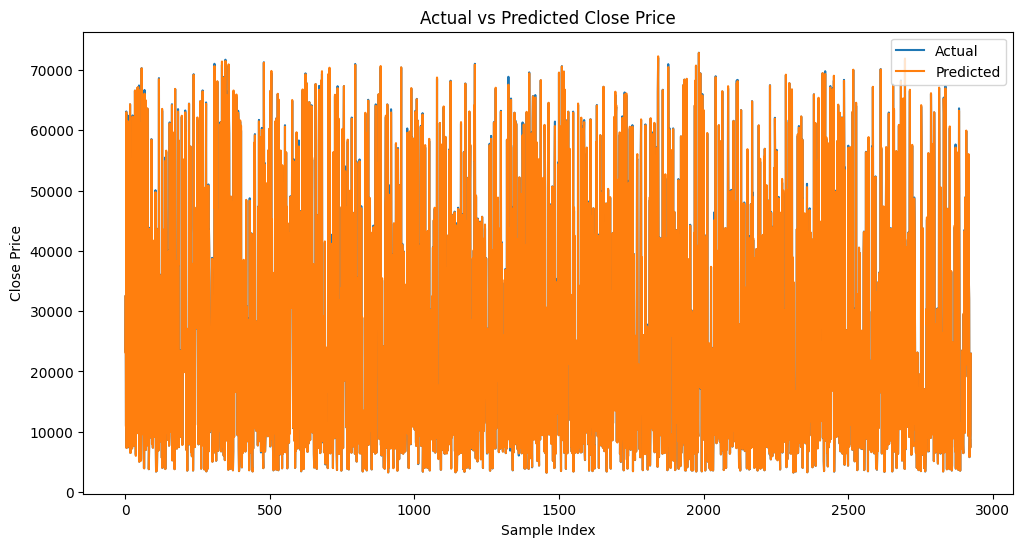

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature selection
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()
